# Pymaceuticals Inc.
---

### Analysis

At the end of our analysis we can see that mouse weight and tumor volume are strongly correlated with a value of 0.88
This matches with the linear regression that we see on our scatter plot
 
Looking at our summary statistics as well as our box plot we can see that Capomulin had great success in lowering tumor volume compared to the other drugs

Alongside Capomulin, we can note that Ramicane yielded similar results



In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Viewing the dataframes
#mouse_metadata 249 rows
#study_results 1893 rows

# Combine the data into a single DataFrame
# Combining on Mouse ID
combined_df = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'])

# Display the data table for preview
combined_df.head()
#combined dataframe has 1893 rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [49]:
# Checking the number of mice.
len(mouse_metadata)

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
#10 rows rows of duplicate data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Optional: Get all the data for the duplicate mouse ID


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
cleaned_df
#1893 to 1880 3 rows of unaccounted duplicate data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [53]:
# Checking the number of mice in the clean DataFrame
cleaned_df['Mouse ID'].value_counts()
#Length has now dropped from 249 to 248

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Using groupby on each drug regimen
mean_volume = cleaned_df.groupby(['Drug Regimen']).mean()
median_volume = cleaned_df.groupby(['Drug Regimen']).median()
variance = cleaned_df.groupby(['Drug Regimen']).var()
std_dev = cleaned_df.groupby(['Drug Regimen']).std()
SEM = cleaned_df.groupby(['Drug Regimen']).sem()
col='Tumor Volume (mm3)'

summary_df = pd.DataFrame({'Mean Tumor Volume': mean_volume[col], 'Median Tumor Volume': median_volume[col],
                        'Tumor Volume Variance': variance[col], 'Tumor Volume Std Dev': std_dev[col], 'Tumor Volume Std Err': SEM[col]})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

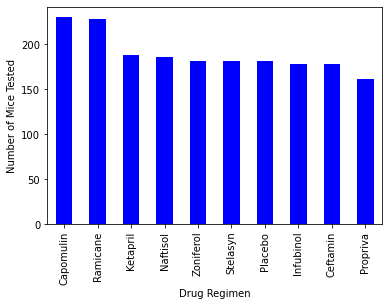

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = combined_df['Drug Regimen'].value_counts()

barchart = total_timepoints.plot.bar(color ='b', align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show

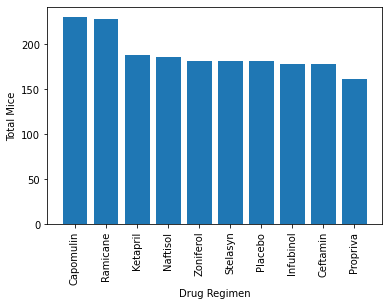

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(total_timepoints.index.values ,total_timepoints.values)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.show()

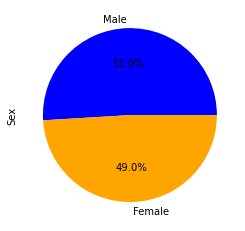

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ['Male', 'Female']
gender_size = cleaned_df['Sex'].value_counts()
colors = ['blue', 'orange']


pie = gender_size.plot.pie(labels = labels, colors = colors, autopct = '%1.1f%%')
pie

([<matplotlib.patches.Wedge at 0x1a04a53ea48>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

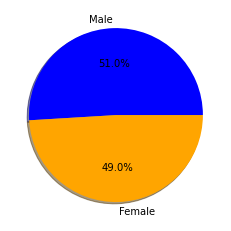

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_size, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True)

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_point = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(max_point, cleaned_df, on=['Mouse ID', 'Timepoint'], how = 'left')
tumor_volume




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

capomulin = tumor_volume[(tumor_volume['Drug Regimen'] == 'Capomulin')]
ramicane = tumor_volume[(tumor_volume['Drug Regimen'] == 'Ramicane')]
infubinol = tumor_volume[(tumor_volume['Drug Regimen'] == 'Infubinol')]
ceftamin = tumor_volume[(tumor_volume['Drug Regimen'] == 'Ceftamin')]

for drug in treatments:
    drug_name = tumor_volume.loc[tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_data.append(drug_name)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#From summary_stats.ipynb
quartiles = drug_name.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
# Determine outliers using upper and lower bounds
outliers = drug_name.loc[(drug_name < lower_bound) | (drug_name > upper_bound)]
    
print(f"{drug}'s potential outliers, {outliers}")

Ceftamin's potential outliers, Series([], Name: Tumor Volume (mm3), dtype: float64)


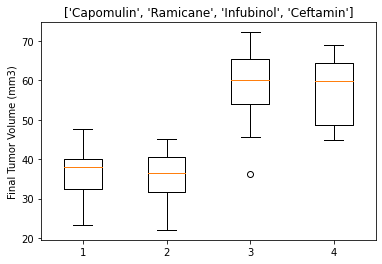

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_data)
plt.show()

## Line and Scatter Plots

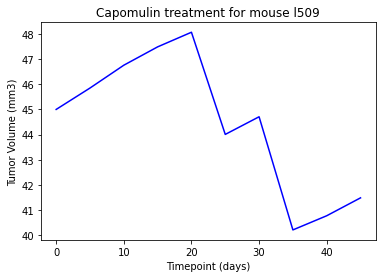

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509']
timepoint = single_mouse['Timepoint']
t_volume = single_mouse['Tumor Volume (mm3)']

plt.plot(timepoint, t_volume, color = 'blue')
plt.title('Capomulin treatment for mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


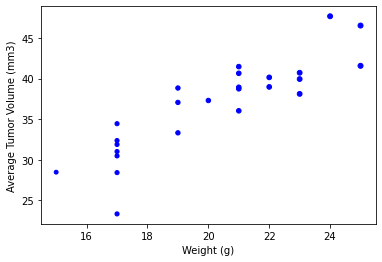

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight = capomulin['Weight (g)'].astype(float)
avg_volume = capomulin['Tumor Volume (mm3)'].astype(float)

scatter = plt.scatter(weight, avg_volume, marker = 'o', facecolors = 'blue', s = weight )


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between weight and tumor volume is 0.88


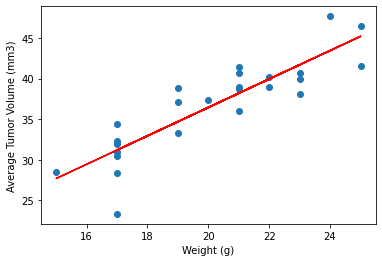

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, avg_volume)

#linear regression and equation
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, avg_volume)
fit = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_volume)
plt.plot(weight, fit, 'r-')
#plt.annotate()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")